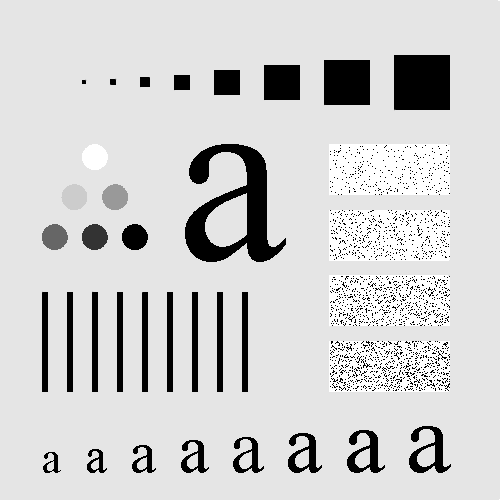

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math

from matplotlib import pyplot as plt
img = cv2.imread('roberts.tif', 0)

cv2_imshow(img)

Encoded Image


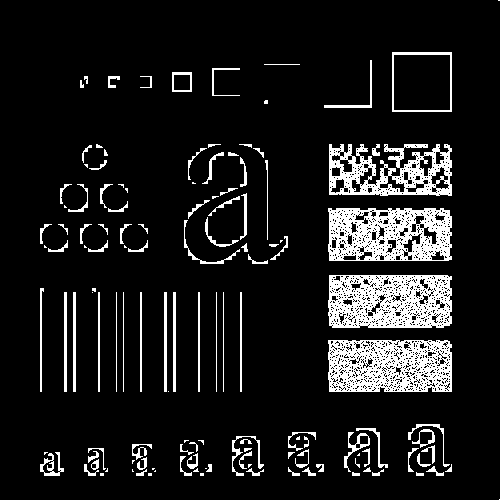

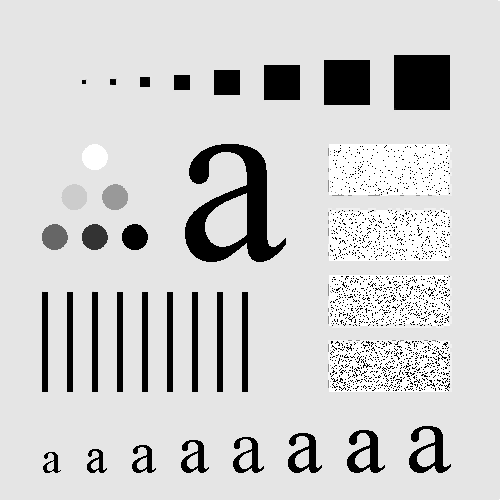

In [ ]:

def block_code(img):
  temp = np.zeros(shape = (4, 4))

  m = 16

  mod_img = np.zeros(shape = (img.shape[0], img.shape[1]))
  fin_img = np.zeros(shape = (img.shape[0], img.shape[1]))
  meaner = 0
  stdd = 0
  for row in range(0, img.shape[0], 4):
    for col in range(0, img.shape[1], 4):
      q = 0
      temp = img[row: row + 4, col: col + 4]
      meaner = np.mean(temp)
      stdd = np.std(temp)

      for i in range(row, row + 4):
        for j in range(col, col + 4):
          if (img[i][j] > meaner):
            mod_img[i][j] = 255
            q+=1
          else:
            mod_img[i][j] = 0
      a = round(meaner - stdd * math.sqrt(q / (m - q)), 0)
      if(q == 0):
        b = meaner
      else:
        b = round(meaner + stdd * math.sqrt((m - q) / q), 0)

      for i in range(row, row + 4):
        for j in range(col, col + 4):
          if (mod_img[i][j] == 0):
            fin_img[i][j] = a
          else:
            fin_img[i][j] = b


  print("Encoded Image")
  cv2_imshow(mod_img)
  print("\n")
  return fin_img

cv2_imshow(block_code(img))